## IEOR 4578 Forecasting 
### Online Retail II
Source: https://archive.ics.uci.edu/dataset/502/online+retail+ii

#### Authors: Ishita Pundir (ip2441), Saum Kothari (sbk2171), Tushar Bura (tb3077)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset 

In [3]:
# Load the dataset
sheet1 = pd.read_excel('../data/online_retail_II.xlsx', sheet_name='Year 2010-2011')
sheet2 = pd.read_excel('../data/online_retail_II.xlsx', sheet_name='Year 2009-2010')

In [4]:
# Combined the two sheets
sheets_combined = pd.concat([sheet1, sheet2], ignore_index = True)

# DATA EXPLORATION

## Conduct a data exploration to comprehend the structure, size, and attributes of the dataset

In [5]:
# Display first five rows
sheets_combined.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
# Display last five rows
sheets_combined.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1067366,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
1067367,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
1067368,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
1067369,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
1067370,538171,21931,JUMBO STORAGE BAG SUKI,2,2010-12-09 20:01:00,1.95,17530.0,United Kingdom


## Identify any missing values through appropriate data preprocessing techniques

In [7]:
# Evaluate the quality of data
sheets_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [8]:
# Check the uniqueness of the value within columns
for col in sheets_combined.columns:
    print(col, len(sheets_combined[col].unique()), sheets_combined[col].unique())

Invoice 53628 [536365 536366 536368 ... 536362 536363 536364]
StockCode 5305 ['85123A' 71053 '84406B' ... 15002 '90142C' '90142B']
Description 5699 ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'amazon adjustment'
 'mailout addition' 'Mailout']
Quantity 1057 [   6    8    2 ...  555 -411 -213]
InvoiceDate 47635 <DatetimeArray>
['2010-12-01 08:26:00', '2010-12-01 08:28:00', '2010-12-01 08:34:00',
 '2010-12-01 08:35:00', '2010-12-01 08:45:00', '2010-12-01 09:00:00',
 '2010-12-01 09:01:00', '2010-12-01 09:02:00', '2010-12-01 09:09:00',
 '2010-12-01 09:32:00',
 ...
 '2010-11-30 17:45:00', '2010-11-30 17:55:00', '2010-11-30 17:56:00',
 '2010-11-30 17:58:00', '2010-11-30 18:05:00', '2010-11-30 18:21:00',
 '2010-11-30 18:46:00', '2010-11-30 18:50:00', '2010-11-30 19:27:00',
 '2010-11-30 19:35:00']
Length: 47635, dtype: datetime64[ns]
Price 2807 [  2.55   3.39   2.75 ... 194.17 630.48  32.29]
Customer ID 5943 [17850. 13047. 12583. ... 15828. 

In [9]:
# Identify null values
sheets_combined.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

## Address any missing values through appropriate data preprocessing techniques

In [10]:
# Drop the duplicates from the dataset completely
sheets_combined = sheets_combined.drop_duplicates()
sheets_combined

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
1044843,536364,21175,GIN + TONIC DIET METAL SIGN,12,2010-11-30 19:35:00,2.10,14441.0,United Kingdom
1044844,536364,21524,DOORMAT SPOTTY HOME SWEET HOME,2,2010-11-30 19:35:00,7.95,14441.0,United Kingdom
1044845,536364,21098,CHRISTMAS TOILET ROLL,12,2010-11-30 19:35:00,1.25,14441.0,United Kingdom
1044846,536364,21181,PLEASE ONE PERSON METAL SIGN,24,2010-11-30 19:35:00,2.10,14441.0,United Kingdom


In [11]:
# Remove the rows which have missing Customer ID
sheets_combined.dropna(subset = ['Customer ID'], inplace = True)

In [12]:
# Replace the missing Description as 'Unknown'
sheets_combined['Description'].fillna('Unknown', inplace = True)

In [13]:
# Checking that null values are removed
sheets_combined.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [14]:
# Reset the index of the dataset
sheets_combined = sheets_combined.reset_index(drop = True)
sheets_combined

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
797880,536364,21175,GIN + TONIC DIET METAL SIGN,12,2010-11-30 19:35:00,2.10,14441.0,United Kingdom
797881,536364,21524,DOORMAT SPOTTY HOME SWEET HOME,2,2010-11-30 19:35:00,7.95,14441.0,United Kingdom
797882,536364,21098,CHRISTMAS TOILET ROLL,12,2010-11-30 19:35:00,1.25,14441.0,United Kingdom
797883,536364,21181,PLEASE ONE PERSON METAL SIGN,24,2010-11-30 19:35:00,2.10,14441.0,United Kingdom


In [15]:
# Check the negative values in the 'Quantity' and 'Price' columns
print('Number of negative values in quantity : ', (sheets_combined.Quantity < 0).sum())
print('Number of negative values in price : ', (sheets_combined.Price < 0).sum())

Number of negative values in quantity :  18390
Number of negative values in price :  0


In [16]:
# Remove the rows with negative values in the 'Quantity' and 'Price' columns
sheets_combined = sheets_combined[(sheets_combined['Quantity'] >= 0) & (sheets_combined['Price'] >= 0)]
sheets_combined

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
797880,536364,21175,GIN + TONIC DIET METAL SIGN,12,2010-11-30 19:35:00,2.10,14441.0,United Kingdom
797881,536364,21524,DOORMAT SPOTTY HOME SWEET HOME,2,2010-11-30 19:35:00,7.95,14441.0,United Kingdom
797882,536364,21098,CHRISTMAS TOILET ROLL,12,2010-11-30 19:35:00,1.25,14441.0,United Kingdom
797883,536364,21181,PLEASE ONE PERSON METAL SIGN,24,2010-11-30 19:35:00,2.10,14441.0,United Kingdom


In [17]:
# Data outside the period 01.12.2009 to 09.12.2011
(sheets_combined.InvoiceDate >= '2011-12-09').sum()

611

In [18]:
# Data outside the period 01.12.2009 to 09.12.2011
(sheets_combined.InvoiceDate <= '2009-12-01').sum()

0

In [19]:
# Filter data between 01.12.2009 to 09.12.2011
sheets_combined = sheets_combined[(sheets_combined['InvoiceDate'] <= '2011-12-09') & (sheets_combined['InvoiceDate'] >= '2009-12-01')]
sheets_combined

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
797880,536364,21175,GIN + TONIC DIET METAL SIGN,12,2010-11-30 19:35:00,2.10,14441.0,United Kingdom
797881,536364,21524,DOORMAT SPOTTY HOME SWEET HOME,2,2010-11-30 19:35:00,7.95,14441.0,United Kingdom
797882,536364,21098,CHRISTMAS TOILET ROLL,12,2010-11-30 19:35:00,1.25,14441.0,United Kingdom
797883,536364,21181,PLEASE ONE PERSON METAL SIGN,24,2010-11-30 19:35:00,2.10,14441.0,United Kingdom


In [20]:
# Check if it is removed
(sheets_combined.InvoiceDate >= '2011-12-09').sum()

0

In [21]:
# Check if it is removed
(sheets_combined.InvoiceDate <= '2009-12-01').sum()

0

## Perform statistical analysis on crucial attributes and Calculate descriptive statistics to gain deeper insights into the distribution of the data

In [22]:
# Statistical analysis for integers and float
sheets_combined.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,778884.000000,778884,778884.000000,778884.000000
mean,13.401420,2011-01-02 19:22:06.269046784,3.218741,15320.834942
min,1.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,2.000000,2010-07-02 13:36:00,1.250000,13971.000000
50%,6.000000,2010-12-02 12:59:00,1.950000,15248.000000
75%,12.000000,2011-08-01 10:26:00,3.750000,16794.000000
max,74215.000000,2011-12-08 20:01:00,10953.500000,18287.000000
std,114.327302,NaN,29.686356,1695.397467


In [23]:
# Statistical analysis for string
sheets_combined.describe(include = 'object')

,Invoice,StockCode,Description,Country
count,778884,778884,778884,778884
unique,36934,4630,5282,41
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,542,5022,5016,700004


### Leverage the power of data visualization libraries such as Matplotlib and Seaborn to craft informative and visually appealing plots. Generate diverse visualizations, including line plots, scatter plots, bar charts, and heatmaps, to unravel relationships and patterns within the data

In [24]:
# Split the 'InvoiceDate' column into year only as 'InvoiceYear' and months only as 'InvoiceMonth'
sheets_combined['InvoiceYear'] = sheets_combined['InvoiceDate'].dt.year
sheets_combined['InvoiceMonth'] = sheets_combined['InvoiceDate'].dt.month
sheets_combined

C:\Users\Tushar Bura\AppData\Local\Temp\ipykernel_11528\2004321549.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sheets_combined['InvoiceYear'] = sheets_combined['InvoiceDate'].dt.year
C:\Users\Tushar Bura\AppData\Local\Temp\ipykernel_11528\2004321549.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sheets_combined['InvoiceMonth'] = sheets_combined['InvoiceDate'].dt.month


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceYear,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12
...,...,...,...,...,...,...,...,...,...,...
797880,536364,21175,GIN + TONIC DIET METAL SIGN,12,2010-11-30 19:35:00,2.10,14441.0,United Kingdom,2010,11
797881,536364,21524,DOORMAT SPOTTY HOME SWEET HOME,2,2010-11-30 19:35:00,7.95,14441.0,United Kingdom,2010,11
797882,536364,21098,CHRISTMAS TOILET ROLL,12,2010-11-30 19:35:00,1.25,14441.0,United Kingdom,2010,11
797883,536364,21181,PLEASE ONE PERSON METAL SIGN,24,2010-11-30 19:35:00,2.10,14441.0,United Kingdom,2010,11


In [25]:
# Calculate the Revenue
sheets_combined['Revenue'] = sheets_combined['Quantity'] * sheets_combined['Price']

C:\Users\Tushar Bura\AppData\Local\Temp\ipykernel_11528\1602049970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sheets_combined['Revenue'] = sheets_combined['Quantity'] * sheets_combined['Price']


## Customer Count vs Country

In [26]:
# Count the Customer ID and group by Country and InvoiceYear
customerid_country = sheets_combined.groupby(['Country', 'InvoiceYear'])['Customer ID'].count().sort_values(ascending=False).reset_index()
customerid_country

,Country,InvoiceYear,Customer ID
0,United Kingdom,2010,346531
1,United Kingdom,2011,325338
2,United Kingdom,2009,28135
3,Germany,2011,8433
4,EIRE,2010,8172
...,...,...,...
90,Saudi Arabia,2011,9
91,Denmark,2009,8
92,Finland,2009,4
93,Sweden,2009,2


c:\Users\Tushar Bura\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Tushar Bura\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Tushar Bura\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Tushar Bura\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_c

[]

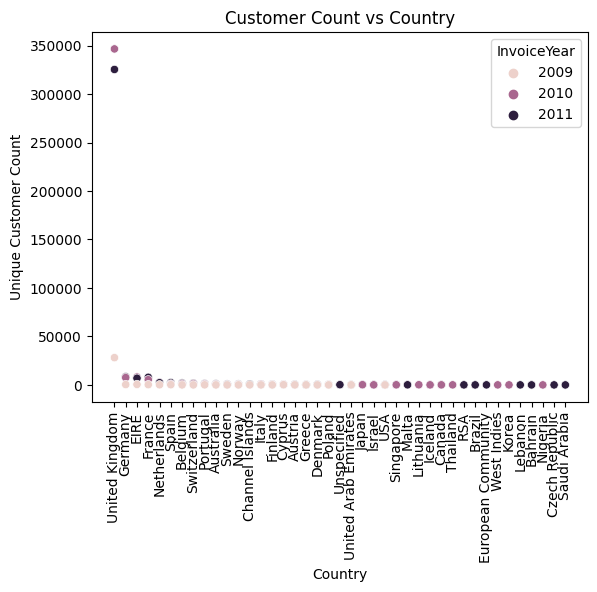

In [27]:
# Distribution of customers by country
customerid_vs_country = sns.scatterplot(x = 'Country', y = 'Customer ID', hue = 'InvoiceYear', data = customerid_country)
customerid_vs_country.set_xlabel('Country')
customerid_vs_country.set_ylabel('Unique Customer Count')
customerid_vs_country.set_title('Customer Count vs Country')
plt.xticks(rotation=90)
plt.plot()

## Revenue based on Country

In [28]:
# Calculate the total Revenue of each country and sort the countries that gives highest Revenue
country_revenue = sheets_combined.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head().reset_index()
country_revenue

,Country,Revenue
0,United Kingdom,1.420969e+07
1,EIRE,6.165705e+05
2,Netherlands,5.540381e+05
3,Germany,4.233300e+05
4,France,3.485015e+05


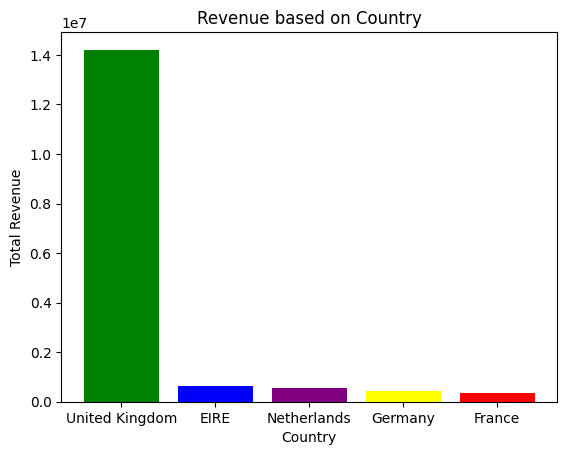

In [29]:
# Plot the bar graph
colors = ['Green', 'Blue', 'Purple', 'Yellow', 'Red']
plt.bar(country_revenue['Country'], country_revenue['Revenue'], color = colors)
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.title('Revenue based on Country')
plt.show()

## Quantity Purchase by Country

In [30]:
# Get the total quantity of each country
country_quantity = sheets_combined.groupby('Country')['Quantity'].sum().sort_values(ascending=False).reset_index().head(5)
country_quantity

,Country,Quantity
0,United Kingdom,8458784
1,Netherlands,384519
2,EIRE,318271
3,France,270183
4,Denmark,237471


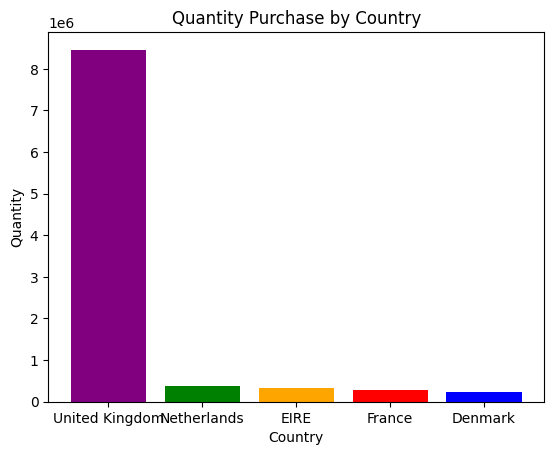

In [31]:
# PLot the bar graph
colors = ['Purple', 'Green', 'Orange', 'Red', 'Blue']
plt.bar(country_quantity['Country'], country_quantity['Quantity'], color = colors)
plt.xlabel('Country')
plt.ylabel('Quantity')
plt.title('Quantity Purchase by Country')
plt.show()

## Quantity vs Customer ID according to the Country

In [32]:
# Count of quantity and group by Customer ID and Country
customerid_quantity = sheets_combined.groupby(['Customer ID', 'Country'])['Quantity'].sum().sort_values(ascending=False).reset_index().head(100)
customerid_quantity

,Customer ID,Country,Quantity
0,14646.0,Netherlands,367833
1,13902.0,Denmark,220600
2,13694.0,United Kingdom,188201
3,18102.0,United Kingdom,181501
4,14156.0,EIRE,164325
...,...,...,...
95,14667.0,United Kingdom,11939
96,16746.0,United Kingdom,11900
97,14849.0,United Kingdom,11838
98,12731.0,France,11641


c:\Users\Tushar Bura\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Tushar Bura\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Tushar Bura\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Tushar Bura\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_c

[]

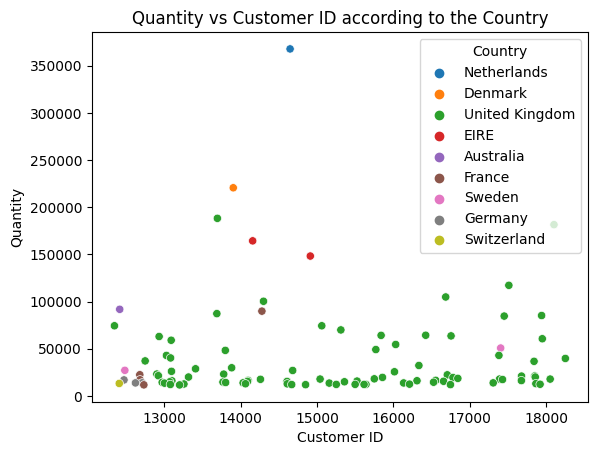

In [33]:
# Create scatter plot
customerid_vs_quantity = sns.scatterplot(x = 'Customer ID', y = 'Quantity', hue = 'Country', data = customerid_quantity)
customerid_vs_quantity.set_xlabel('Customer ID')
customerid_vs_quantity.set_ylabel('Quantity')
customerid_vs_quantity.set_title('Quantity vs Customer ID according to the Country')
plt.plot()

## Percentage Revenue based on Top 10 Customers

In [34]:
# Total revenue of each Customer ID
customerid_revenue = sheets_combined.groupby('Customer ID')['Revenue'].sum().sort_values(ascending=False).head(10)
customerid_revenue

Customer ID
18102.0    580517.60
14646.0    528602.52
14156.0    313437.62
14911.0    291420.81
17450.0    244784.25
13694.0    195640.69
17511.0    172132.87
16684.0    147142.77
12415.0    144458.37
15061.0    126389.02
Name: Revenue, dtype: float64

In [35]:
# Change the style of the pie chart
#plt.style.use('tableau-colorblind10')

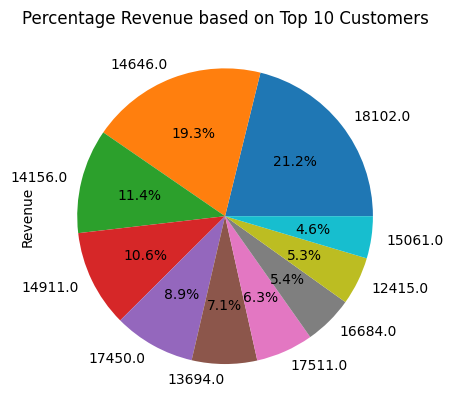

In [36]:
# Plot the pie chart
customerid_revenue.plot(kind = 'pie', autopct='%1.1f%%')
plt.title('Percentage Revenue based on Top 10 Customers')
plt.show()

## Frequent Top Customer Visits

In [37]:
# Count of the Invoice No for each Customer ID
invoiceno_customerid = sheets_combined.groupby('Customer ID')['Invoice'].count().sort_values(ascending=False).head(10)
invoiceno_customerid

Customer ID
17841.0    12435
14911.0    11079
12748.0     6563
14606.0     6359
14096.0     5111
15311.0     4286
14156.0     4038
14646.0     3854
13089.0     3316
16549.0     3093
Name: Invoice, dtype: int64

In [38]:
# Change the style of the pie chart
plt.style.use('seaborn-v0_8-white')

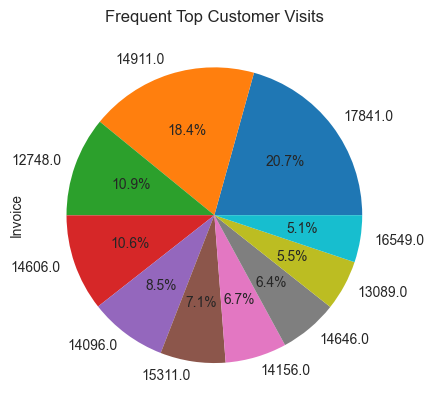

In [39]:
# Plot the pie chart
invoiceno_customerid.plot(kind = 'pie', autopct='%1.1f%%')
plt.title('Frequent Top Customer Visits')
plt.show()

## Top 5 Customers Purchasing Behavior over Time

In [40]:
# Find the top 5 customers
top_customers = sheets_combined['Customer ID'].value_counts().head(5)
top_customers

Customer ID
17841.0    12435
14911.0    11079
12748.0     6563
14606.0     6359
14096.0     5111
Name: count, dtype: int64

In [41]:
# Filter the top 5 customers
filtered_df = sheets_combined[sheets_combined['Customer ID'].isin(top_customers.index)]

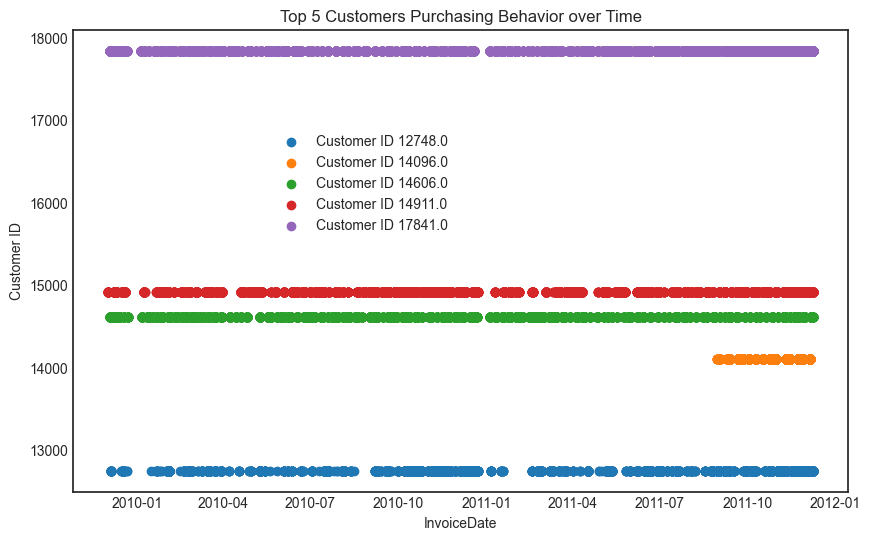

In [42]:
# Crete the scatter plot
plt.figure(figsize=(10, 6))
for customer_id, group in filtered_df.groupby('Customer ID'):
    plt.scatter(group['InvoiceDate'], [customer_id] * len(group), label=f'Customer ID {customer_id}')

plt.xlabel('InvoiceDate')
plt.ylabel('Customer ID')
plt.title('Top 5 Customers Purchasing Behavior over Time')
plt.legend(loc='upper right', bbox_to_anchor=(0.5, 0.8))
plt.show()

## StockCode - Country Relationship Heatmap

In [43]:
# Count the StockCode and group by Customer ID and Country
customerid = sheets_combined.groupby(['Customer ID','Country'])['StockCode'].count().sort_values(ascending=False).reset_index().head(10)
customerid

,Customer ID,Country,StockCode
0,17841.0,United Kingdom,12435
1,14911.0,EIRE,11079
2,12748.0,United Kingdom,6563
3,14606.0,United Kingdom,6359
4,14096.0,United Kingdom,5111
5,15311.0,United Kingdom,4286
6,14156.0,EIRE,4038
7,14646.0,Netherlands,3854
8,13089.0,United Kingdom,3316
9,16549.0,United Kingdom,3093


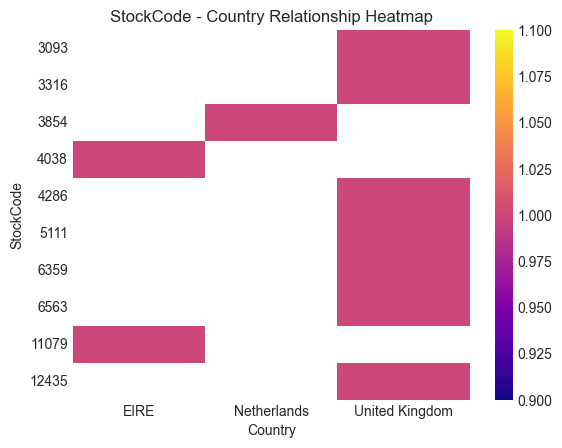

In [44]:
# Create the heatmap
country_stock_pivot = customerid.pivot_table(index='StockCode', columns='Country', values='Customer ID', aggfunc='count')
sns.heatmap(country_stock_pivot, cmap = 'plasma')
plt.title("StockCode - Country Relationship Heatmap")
plt.show()

## Month wise Revenue

In [45]:
# Group the data according to InvoiceYear and InvoiceMonth and get the total Revenue
invoicemonth_revenue = sheets_combined.groupby(['InvoiceYear', 'InvoiceMonth'])['Revenue'].sum().reset_index()
invoicemonth_revenue

,InvoiceYear,InvoiceMonth,Revenue
0,2009,12,683504.010
1,2010,1,555802.672
2,2010,2,504558.956
3,2010,3,696978.471
4,2010,4,591982.002
5,2010,5,597833.380
6,2010,6,636371.130
7,2010,7,589736.170
8,2010,8,602224.600
9,2010,9,829013.951


In [46]:
# Change the style of the bar graph
plt.style.use('seaborn-v0_8-bright')

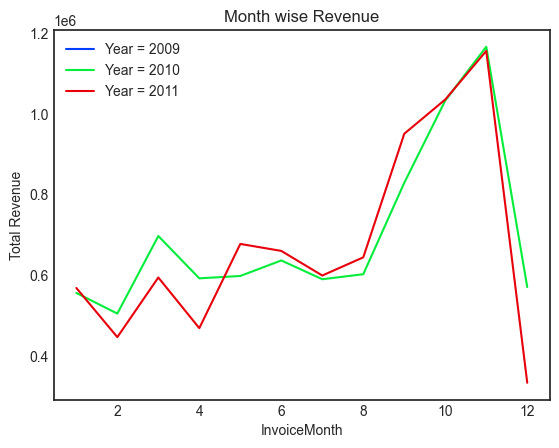

In [47]:
# Seperate line for each InvoiceYear
invoiceyears = invoicemonth_revenue['InvoiceYear'].unique()

for year in invoiceyears:
    data = invoicemonth_revenue[invoicemonth_revenue['InvoiceYear'] == year]
    colors = ['Green', 'Red']
    plt.plot(data['InvoiceMonth'], data['Revenue'], label = f'Year = {year}')

plt.xlabel('InvoiceMonth')
plt.ylabel('Total Revenue')
plt.title('Month wise Revenue')
plt.legend()
plt.show()

## Month wise Stock code

In [48]:
# Count of the stockcode and group by InvoiceYear and InvoiceMonth
invoicemonth_stockcode = sheets_combined.groupby(['InvoiceYear', 'InvoiceMonth'])['StockCode'].count().reset_index()
invoicemonth_stockcode

,InvoiceYear,InvoiceMonth,StockCode
0,2009,12,30279
1,2010,1,21461
2,2010,2,23042
3,2010,3,31783
4,2010,4,26834
5,2010,5,28233
6,2010,6,30691
7,2010,7,26644
8,2010,8,26030
9,2010,9,34131


In [49]:
# Change the style of the bar graph
plt.style.use('seaborn-v0_8-bright')

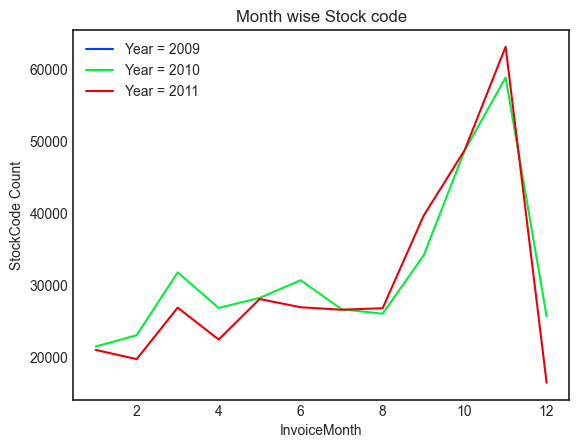

In [50]:
# Seperate line for each InvoiceYear
invoiceyears = invoicemonth_stockcode['InvoiceYear'].unique()

for year in invoiceyears:
    data = invoicemonth_stockcode[invoicemonth_stockcode['InvoiceYear'] == year]
    plt.plot(data['InvoiceMonth'], data['StockCode'], label = f'Year = {year}')

plt.xlabel('InvoiceMonth')
plt.ylabel('StockCode Count')
plt.title('Month wise Stock code')
plt.legend()
plt.show()

## Sales Trends Over Time

In [51]:
# Group the data according to InvoiceYear and InvoiceMonth and get the total quantity for each month
date_vs_quantity = sheets_combined.groupby(['InvoiceYear', 'InvoiceMonth'])['Quantity'].sum().reset_index()
date_vs_quantity

,InvoiceYear,InvoiceMonth,Quantity
0,2009,12,398708
1,2010,1,370128
2,2010,2,371871
3,2010,3,502101
4,2010,4,350604
5,2010,5,384960
6,2010,6,389880
7,2010,7,324638
8,2010,8,452551
9,2010,9,567806


In [52]:
# Change the line graph style
plt.style.use('seaborn-v0_8-white')

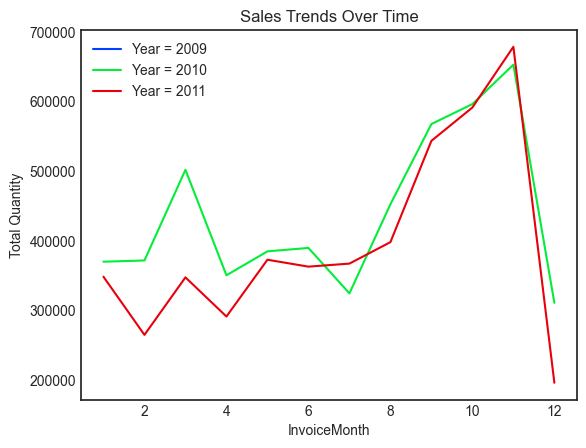

In [53]:
# Seperate line for each InvoiceYear
invoiceyears = date_vs_quantity['InvoiceYear'].unique()

for year in invoiceyears:
    data = date_vs_quantity[date_vs_quantity['InvoiceYear'] == year]
    colors = ['Blue', 'Red']
    plt.plot(data['InvoiceMonth'], data['Quantity'], label = f'Year = {year}')
    
plt.xlabel('InvoiceMonth')
plt.ylabel('Total Quantity')
plt.title('Sales Trends Over Time')
plt.legend()
plt.show()

## Customer Purchasing Behavior

In [54]:
# Group the data according to InvoiceYear and InvoiceMonth and get the total count of Customer ID
customerid_vs_invoicedate = sheets_combined.groupby(['InvoiceYear', 'InvoiceMonth'])['Customer ID'].count().reset_index()
customerid_vs_invoicedate

,InvoiceYear,InvoiceMonth,Customer ID
0,2009,12,30279
1,2010,1,21461
2,2010,2,23042
3,2010,3,31783
4,2010,4,26834
5,2010,5,28233
6,2010,6,30691
7,2010,7,26644
8,2010,8,26030
9,2010,9,34131


In [55]:
# Change the style of the line graph
plt.style.use('seaborn-v0_8-ticks')

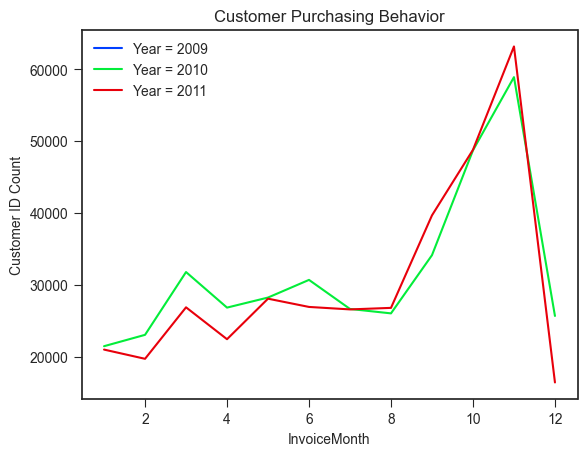

In [56]:
# Seperate line for each InvoiceYear
invoiceyears = date_vs_quantity['InvoiceYear'].unique()

for year in invoiceyears:
    data = customerid_vs_invoicedate[customerid_vs_invoicedate['InvoiceYear'] == year]
    plt.plot(data['InvoiceMonth'], data['Customer ID'], label = f'Year = {year}')
    
plt.xlabel('InvoiceMonth')
plt.ylabel('Customer ID Count')
plt.title('Customer Purchasing Behavior')
plt.legend()
plt.show()

## Unit price with Quantity

In [57]:
# Calculate the total count of quantity and group by price and sort
quantity_price = sheets_combined.groupby('Price')['Quantity'].count().sort_values(ascending=False).head(10)
quantity_price

Price
1.25    94463
1.65    68825
2.95    60631
0.85    59334
0.42    41044
2.10    39187
3.75    36904
4.95    32419
1.95    31790
2.55    29443
Name: Quantity, dtype: int64

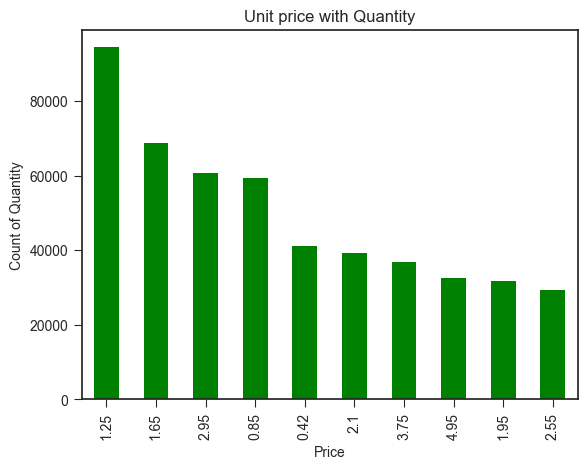

In [58]:
# Plot the bar graph
quantity_price.plot(kind ='bar', color = 'Green')
plt.xlabel('Price')
plt.ylabel('Count of Quantity')
plt.title('Unit price with Quantity')
plt.show()

## Explore and investigate the most popular products, best-selling categories, and sales trends over time. Analyze the customer demographics and purchasing behavior to discern potential patterns

## Most popular products

In [59]:
# Count of the customer ID for each Top 5 Description
customerid_count = sheets_combined.groupby('Description')['Customer ID'].count().sort_values(ascending=False).reset_index().head(10)
customerid_count

,Description,Customer ID
0,WHITE HANGING HEART T-LIGHT HOLDER,5016
1,REGENCY CAKESTAND 3 TIER,3336
2,ASSORTED COLOUR BIRD ORNAMENT,2691
3,JUMBO BAG RED RETROSPOT,2640
4,PARTY BUNTING,2099
5,LUNCH BAG BLACK SKULL.,2044
6,REX CASH+CARRY JUMBO SHOPPER,1950
7,LUNCH BAG SPACEBOY DESIGN,1890
8,STRAWBERRY CERAMIC TRINKET BOX,1859
9,HOME BUILDING BLOCK WORD,1852


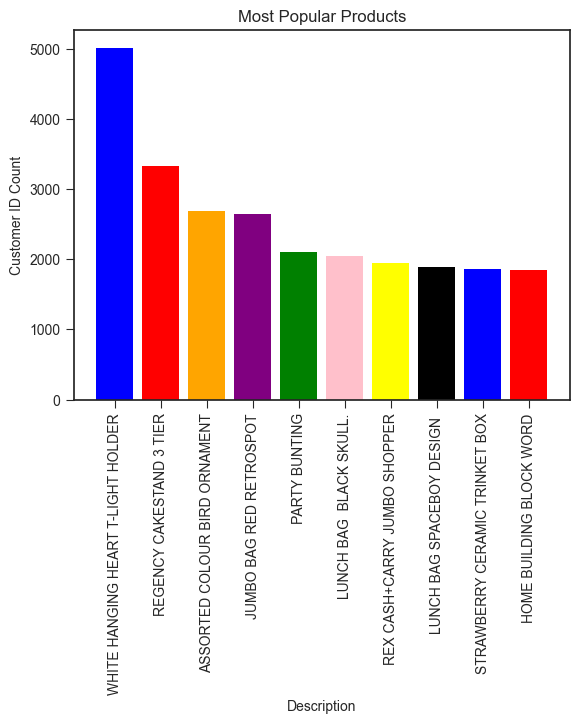

In [60]:
# Plot the bar graph
colors = ['Blue', 'Red', 'Orange', 'Purple', 'Green', 'Pink', 'Yellow', 'Black']
plt.bar(customerid_count['Description'], customerid_count['Customer ID'], color = colors)
plt.xlabel('Description')
plt.ylabel('Customer ID Count')
plt.title('Most Popular Products')
plt.xticks(rotation=90)
plt.show()

## Best-selling Products

In [61]:
# Count of the Quantity for each Top 10 Description
quantity_count = sheets_combined.groupby('Description')['Quantity'].count().sort_values(ascending=False).reset_index().head(10)
quantity_count

,Description,Quantity
0,WHITE HANGING HEART T-LIGHT HOLDER,5016
1,REGENCY CAKESTAND 3 TIER,3336
2,ASSORTED COLOUR BIRD ORNAMENT,2691
3,JUMBO BAG RED RETROSPOT,2640
4,PARTY BUNTING,2099
5,LUNCH BAG BLACK SKULL.,2044
6,REX CASH+CARRY JUMBO SHOPPER,1950
7,LUNCH BAG SPACEBOY DESIGN,1890
8,STRAWBERRY CERAMIC TRINKET BOX,1859
9,HOME BUILDING BLOCK WORD,1852


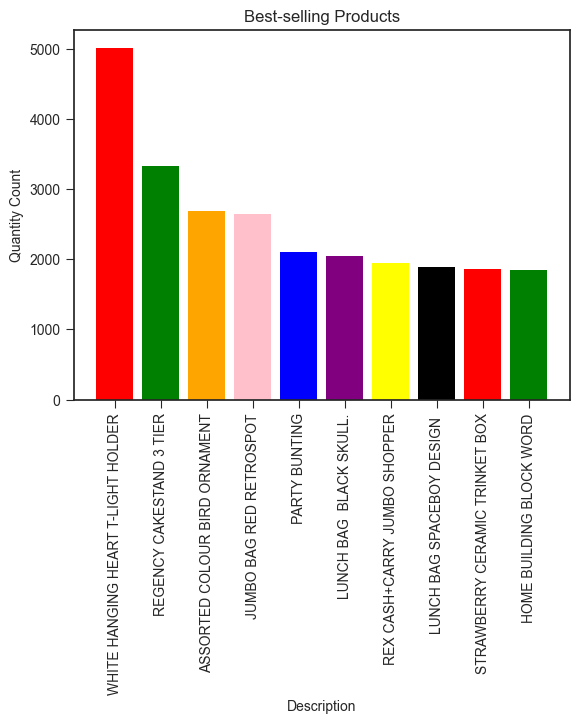

In [62]:
# Plot the bar graph
colors = ['Red', 'Green', 'Orange', 'Pink', 'Blue', 'Purple', 'Yellow', 'Black']
plt.bar(quantity_count['Description'], quantity_count['Quantity'], color = colors)
plt.xlabel('Description')
plt.ylabel('Quantity Count')
plt.title('Best-selling Products')
plt.xticks(rotation=90)
plt.show()

## Uncover correlations between various attributes and present any intriguing findings you discover during your analysis¶

In [63]:
correlationship = sheets_combined[['Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Revenue', 'InvoiceYear', 'InvoiceMonth']].corr()
correlationship

,Quantity,InvoiceDate,Price,Customer ID,Revenue,InvoiceYear,InvoiceMonth
Quantity,1.000000,-0.007144,-0.006207,-0.011704,0.702457,-0.002758,-0.009556
InvoiceDate,-0.007144,1.000000,-0.004596,-0.013893,-0.003279,0.884669,0.352783
Price,-0.006207,-0.004596,1.000000,-0.007504,0.249948,-0.002574,-0.004741
Customer ID,-0.011704,-0.013893,-0.007504,1.000000,-0.010949,-0.029651,0.029549
Revenue,0.702457,-0.003279,0.249948,-0.010949,1.000000,0.000538,-0.007762
InvoiceYear,-0.002758,0.884669,-0.002574,-0.029651,0.000538,1.000000,-0.122420
InvoiceMonth,-0.009556,0.352783,-0.004741,0.029549,-0.007762,-0.122420,1.000000


<Axes: >

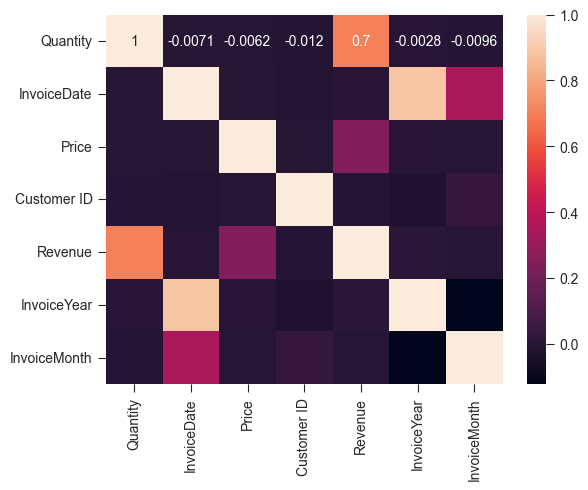

In [64]:
sns.heatmap(correlationship, annot = True)

# Time Series Analysis

#### Imports

In [97]:
import warnings
warnings.filterwarnings('ignore') 

In [98]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
from statsmodels.tsa.stattools import acovf
from matplotlib.ticker import FormatStrFormatter
import datetime as dt
from scipy import signal
from scipy.fft import fft, ifft
from matplotlib.ticker import AutoMinorLocator
import math
from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot, abline_plot
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm

## Time Series Plot, Autocorrelation & PSD

### by Month-Year

In [99]:
# Grouping by InvoiceYear and InvoiceMonth, then summing the Revenue
data1 = sheets_combined.groupby(['InvoiceYear', 'InvoiceMonth'])['Revenue'].sum().reset_index()
data1.shape
# len(data1['InvoiceDate'].unique())

(25, 3)

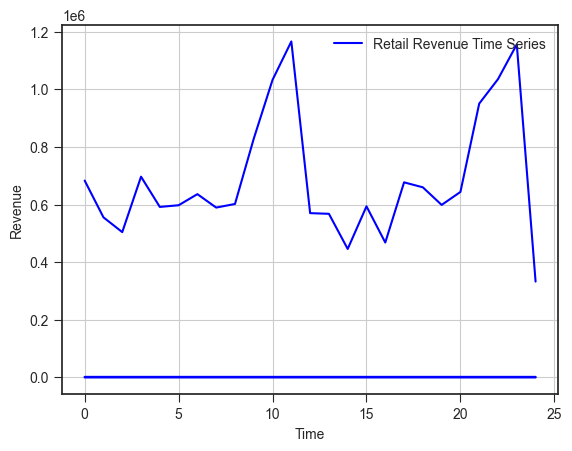

<Figure size 1000x700 with 0 Axes>

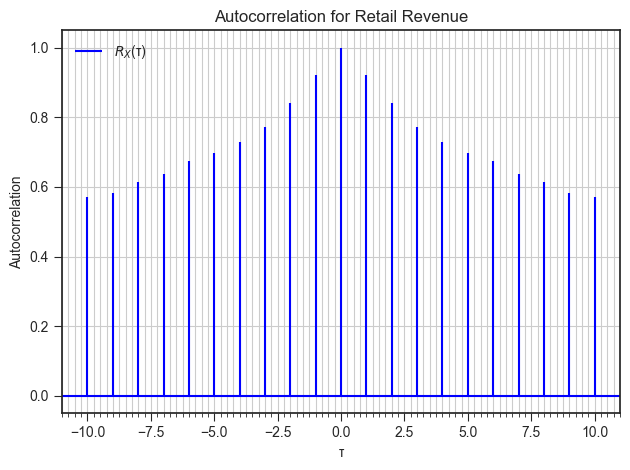

<Figure size 1000x700 with 0 Axes>

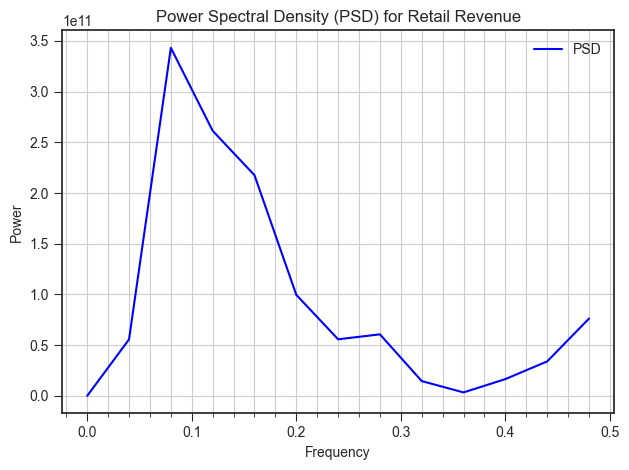

In [100]:
# Plotting Time Series 
plt.plot(data1, color='blue')
plt.ylabel('Revenue')
plt.xlabel('Time')
plt.legend(['Retail Revenue Time Series'])
plt.grid(True)
plt.show()

# Autocorrelation 
plt.figure(figsize=(10, 7))
fig, ax = plt.subplots()
ax.acorr(data1['Revenue'].values, color='blue')
minor_locator = AutoMinorLocator(10)
ax.xaxis.set_minor_locator(minor_locator)
plt.grid(which='minor')
plt.legend(['$R_X$(τ)'], loc='upper left')
plt.xlabel('τ')
plt.ylabel('Autocorrelation')
ax.grid(True, which='both')
plt.title('Autocorrelation for Retail Revenue')
plt.tight_layout()
plt.show()

# Power Spectral Density (PSD) for WholeFood
freqs, psd = signal.welch(data1['Revenue'].values)
plt.figure(figsize=(10, 7))
fig, ax = plt.subplots()
ax.plot(freqs, psd, color='blue')
minor_locator = AutoMinorLocator(5)
ax.xaxis.set_minor_locator(minor_locator)
plt.grid(which='minor')
plt.legend(['PSD'])
plt.xlabel('Frequency')
plt.ylabel('Power')
ax.grid(True, which='both')
plt.title('Power Spectral Density (PSD) for Retail Revenue')
plt.tight_layout()
plt.show()

### by Date

In [101]:
# Grouping by InvoiceDate, then summing the Revenue
data1 = sheets_combined.groupby(['InvoiceDate'])['Revenue'].sum().reset_index()
data1.shape
# len(data1['InvoiceDate'].unique())

(34555, 2)

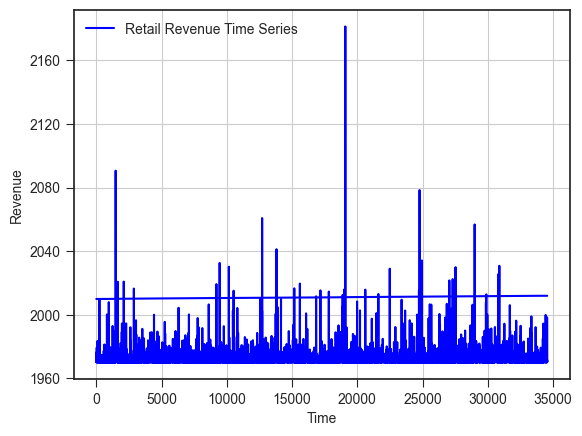

<Figure size 1000x700 with 0 Axes>

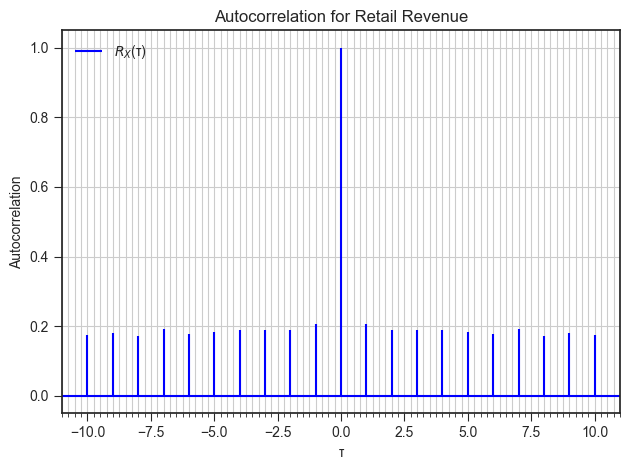

<Figure size 1000x700 with 0 Axes>

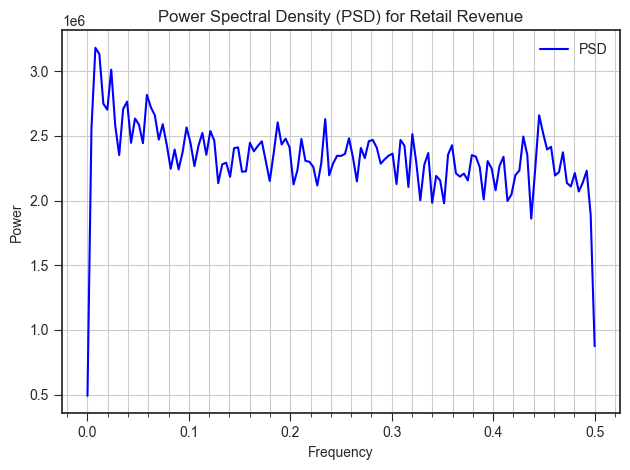

In [102]:
# Plotting Time Series 
plt.plot(data1, color='blue')
plt.ylabel('Revenue')
plt.xlabel('Time')
plt.legend(['Retail Revenue Time Series'])
plt.grid(True)
plt.show()

# Autocorrelation 
plt.figure(figsize=(10, 7))
fig, ax = plt.subplots()
ax.acorr(data1['Revenue'].values, color='blue')
minor_locator = AutoMinorLocator(10)
ax.xaxis.set_minor_locator(minor_locator)
plt.grid(which='minor')
plt.legend(['$R_X$(τ)'], loc='upper left')
plt.xlabel('τ')
plt.ylabel('Autocorrelation')
ax.grid(True, which='both')
plt.title('Autocorrelation for Retail Revenue')
plt.tight_layout()
plt.show()

# Power Spectral Density (PSD) for WholeFood
freqs, psd = signal.welch(data1['Revenue'].values)
plt.figure(figsize=(10, 7))
fig, ax = plt.subplots()
ax.plot(freqs, psd, color='blue')
minor_locator = AutoMinorLocator(5)
ax.xaxis.set_minor_locator(minor_locator)
plt.grid(which='minor')
plt.legend(['PSD'])
plt.xlabel('Frequency')
plt.ylabel('Power')
ax.grid(True, which='both')
plt.title('Power Spectral Density (PSD) for Retail Revenue')
plt.tight_layout()
plt.show()

## Convolution(5), MA(5), Butterworth Filter in Low Pass

### by Month-Year

In [103]:
# Grouping by InvoiceYear and InvoiceMonth, then summing the Revenue
data1 = sheets_combined.groupby(['InvoiceYear', 'InvoiceMonth'])['Revenue'].sum().reset_index()

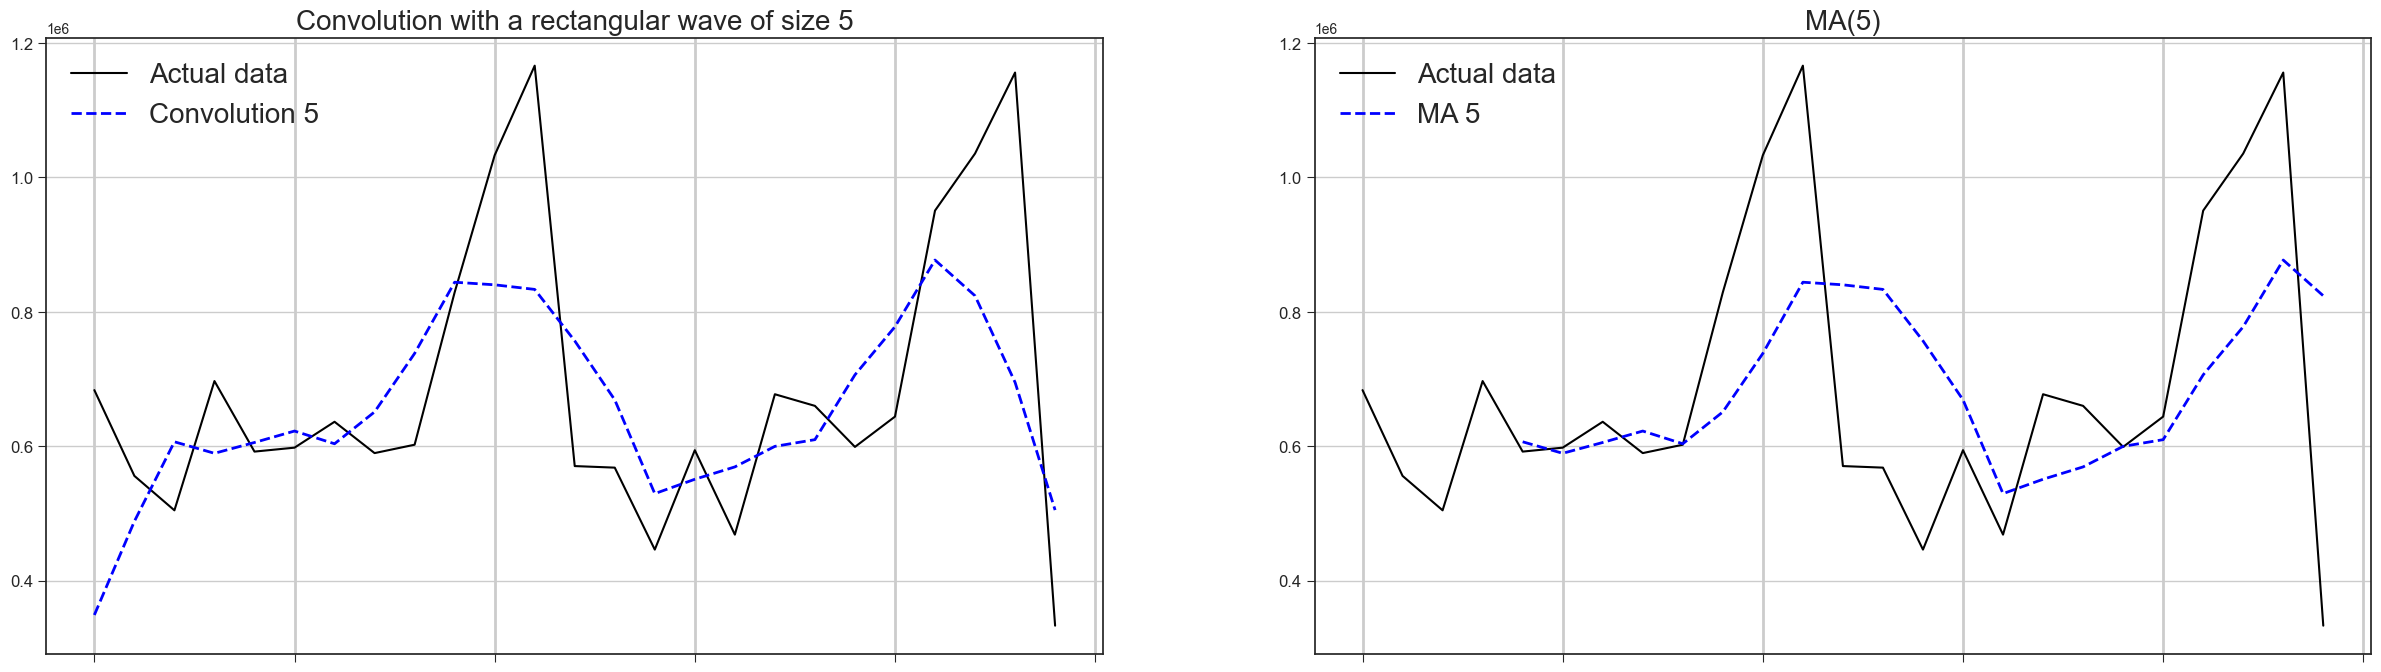

In [104]:
# for window size 5
### Convolution and MA
t = np.arange(0, data1.shape[0])
s1 = data1.Revenue.values
# Convolution
filtered = signal.convolve(s1, [1/5,1/5,1/5,1/5,1/5], mode='same')
# MA
x = pd.DataFrame(s1)
x = np.concatenate( x.rolling(5).mean().values.tolist(), axis=0 )
fig = plt.figure(figsize=(30, 8))

ax1 = plt.subplot(121)
plt.plot(t, s1,'k')
plt.plot(t, filtered,'--b',linewidth=2)
plt.title("Convolution with a rectangular wave of size 5", fontsize=20)
plt.tick_params('x', labelbottom=False)
plt.yticks(fontsize=12)
ax1.xaxis.grid(linewidth=2)
ax1.yaxis.grid(linewidth=1)
ax1.legend(['Actual data','Convolution 5'],fontsize=20)

ax2 = plt.subplot(122)
plt.plot(t, s1,'k')
plt.plot(t, x,'--b',linewidth=2)
plt.title("MA(5)", fontsize=20)
plt.tick_params('x', labelbottom=False)
plt.yticks(fontsize=12)
ax2.xaxis.grid(linewidth=2)
ax2.yaxis.grid(linewidth=1)
ax2.legend(['Actual data','MA 5'],fontsize=20)
plt.grid(True)
plt.show()

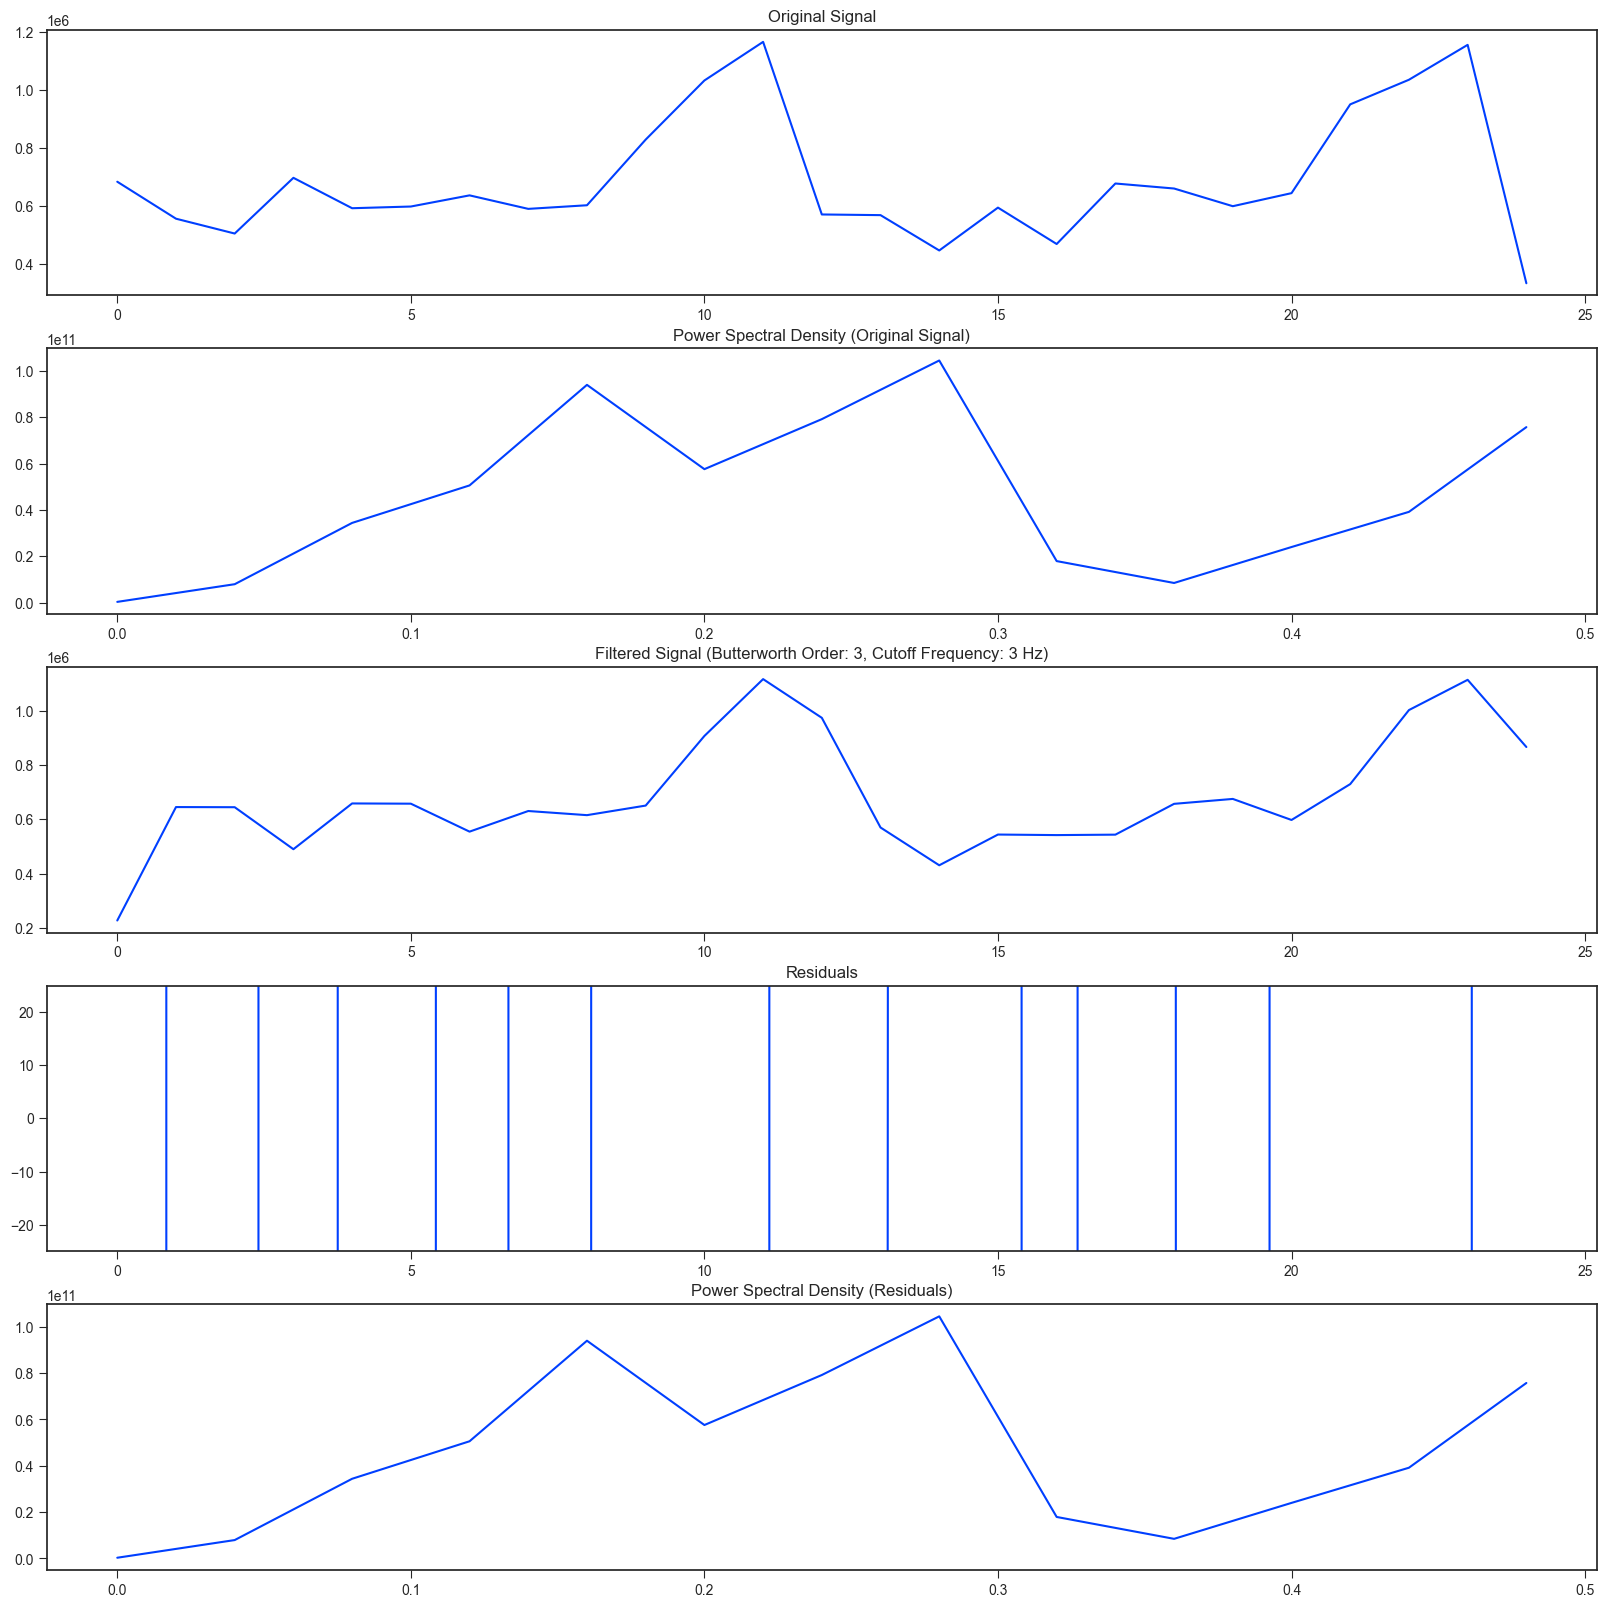

In [105]:
# Butterworth Filter in Low Pass

t = np.arange(0, data1.shape[0])
sig = data1.Revenue.values
RMSE = 10000000000
fss=0
order=0

for i in np.arange(3,20):
    for j in np.arange(i,30):
        sos = signal.butter(i, 1, 'lowpass', fs=j, output='sos')
        filtered = signal.sosfilt(sos, sig)
        freqs, psd = signal.welch(sig)
        freqs, psd = signal.welch(sig-filtered)
        MSE=100000000000000000000
        MSE = np.square(sig-filtered).mean() 
        if(RMSE > math.sqrt(MSE)):
            RMSE = math.sqrt(MSE)
            order = i
            fss = j
            fig = plt.figure(figsize=(20, 20))
            ax1 = plt.subplot(511)
            plt.plot(t, sig)
            plt.title('Original Signal')
            ax2 = plt.subplot(512)
            plt.plot(freqs, psd)
            plt.title('Power Spectral Density (Original Signal)')
            ax3 = plt.subplot(513)
            plt.plot(t, filtered)
            plt.title('Filtered Signal (Butterworth Order: {}, Cutoff Frequency: {} Hz)'.format(order, fss))
            ax4 = plt.subplot(514)
            plt.plot(t,sig-filtered)
            plt.ylim(-25,25)
            plt.title('Residuals')
            ax5 = plt.subplot(515)
            plt.plot(freqs, psd)
            plt.title('Power Spectral Density (Residuals)')
            plt.show()

### by Date

In [106]:
# Grouping by InvoiceDate, then summing the Revenue
data1 = sheets_combined.groupby(['InvoiceDate'])['Revenue'].sum().reset_index()

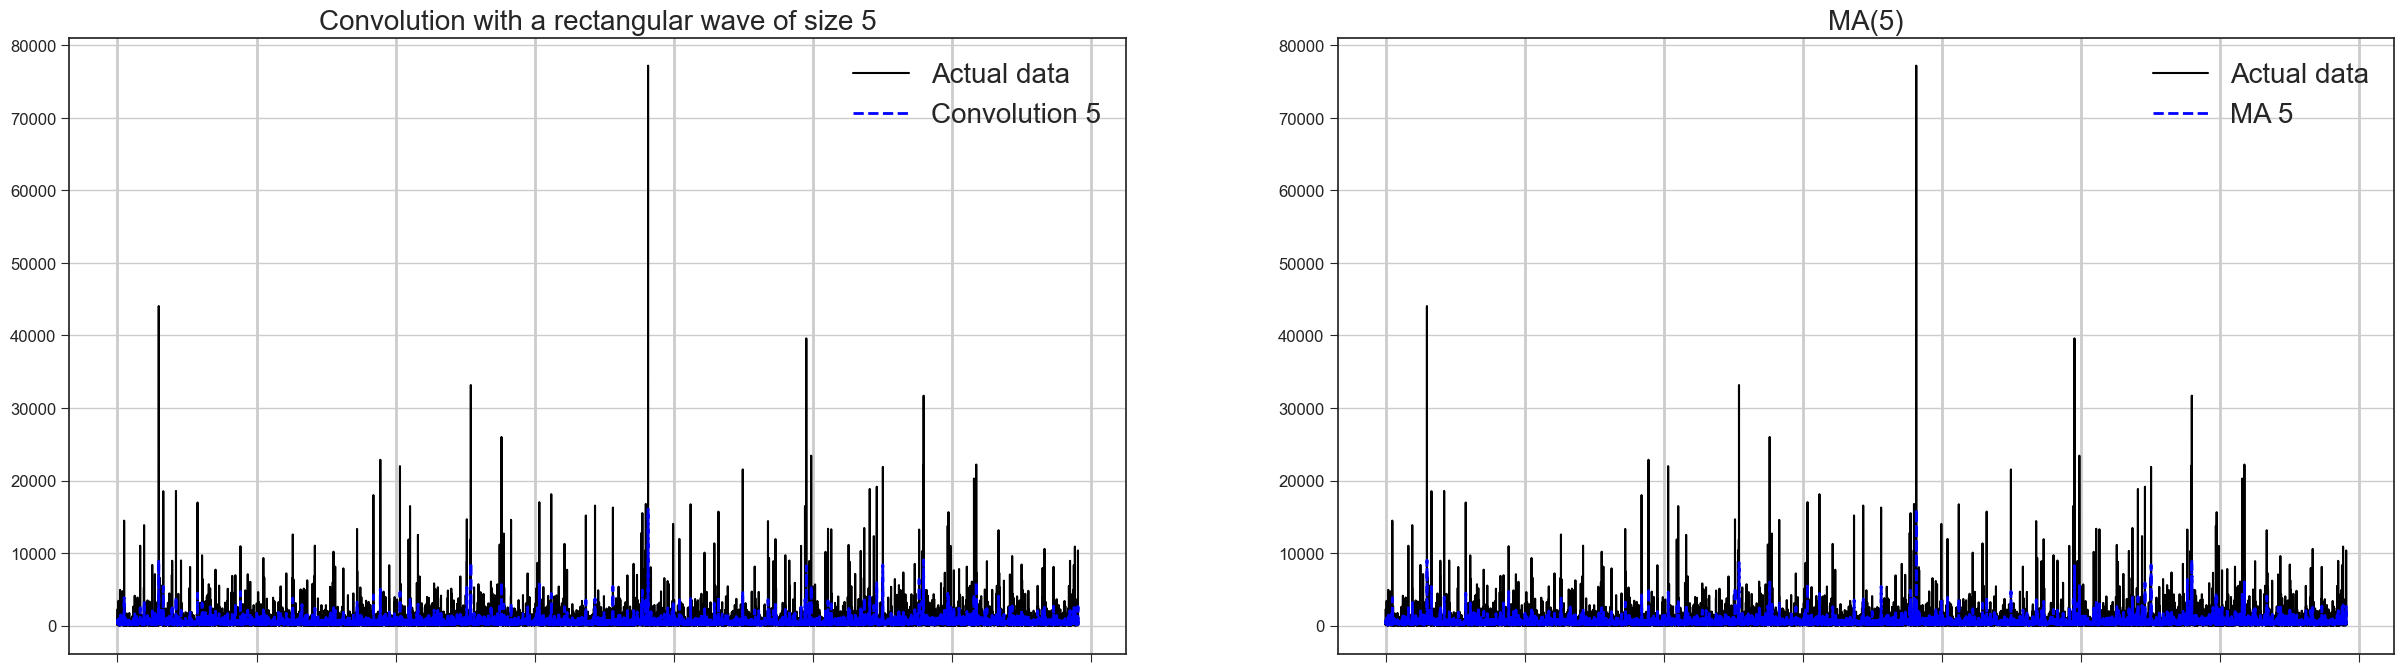

In [107]:
# for window size 5
### Convolution and MA
t = np.arange(0, data1.shape[0])
s1 = data1.Revenue.values
# Convolution
filtered = signal.convolve(s1, [1/5,1/5,1/5,1/5,1/5], mode='same')
# MA
x = pd.DataFrame(s1)
x = np.concatenate( x.rolling(5).mean().values.tolist(), axis=0 )
fig = plt.figure(figsize=(30, 8))

ax1 = plt.subplot(121)
plt.plot(t, s1,'k')
plt.plot(t, filtered,'--b',linewidth=2)
plt.title("Convolution with a rectangular wave of size 5", fontsize=20)
plt.tick_params('x', labelbottom=False)
plt.yticks(fontsize=12)
ax1.xaxis.grid(linewidth=2)
ax1.yaxis.grid(linewidth=1)
ax1.legend(['Actual data','Convolution 5'],fontsize=20)

ax2 = plt.subplot(122)
plt.plot(t, s1,'k')
plt.plot(t, x,'--b',linewidth=2)
plt.title("MA(5)", fontsize=20)
plt.tick_params('x', labelbottom=False)
plt.yticks(fontsize=12)
ax2.xaxis.grid(linewidth=2)
ax2.yaxis.grid(linewidth=1)
ax2.legend(['Actual data','MA 5'],fontsize=20)
plt.grid(True)
plt.show()

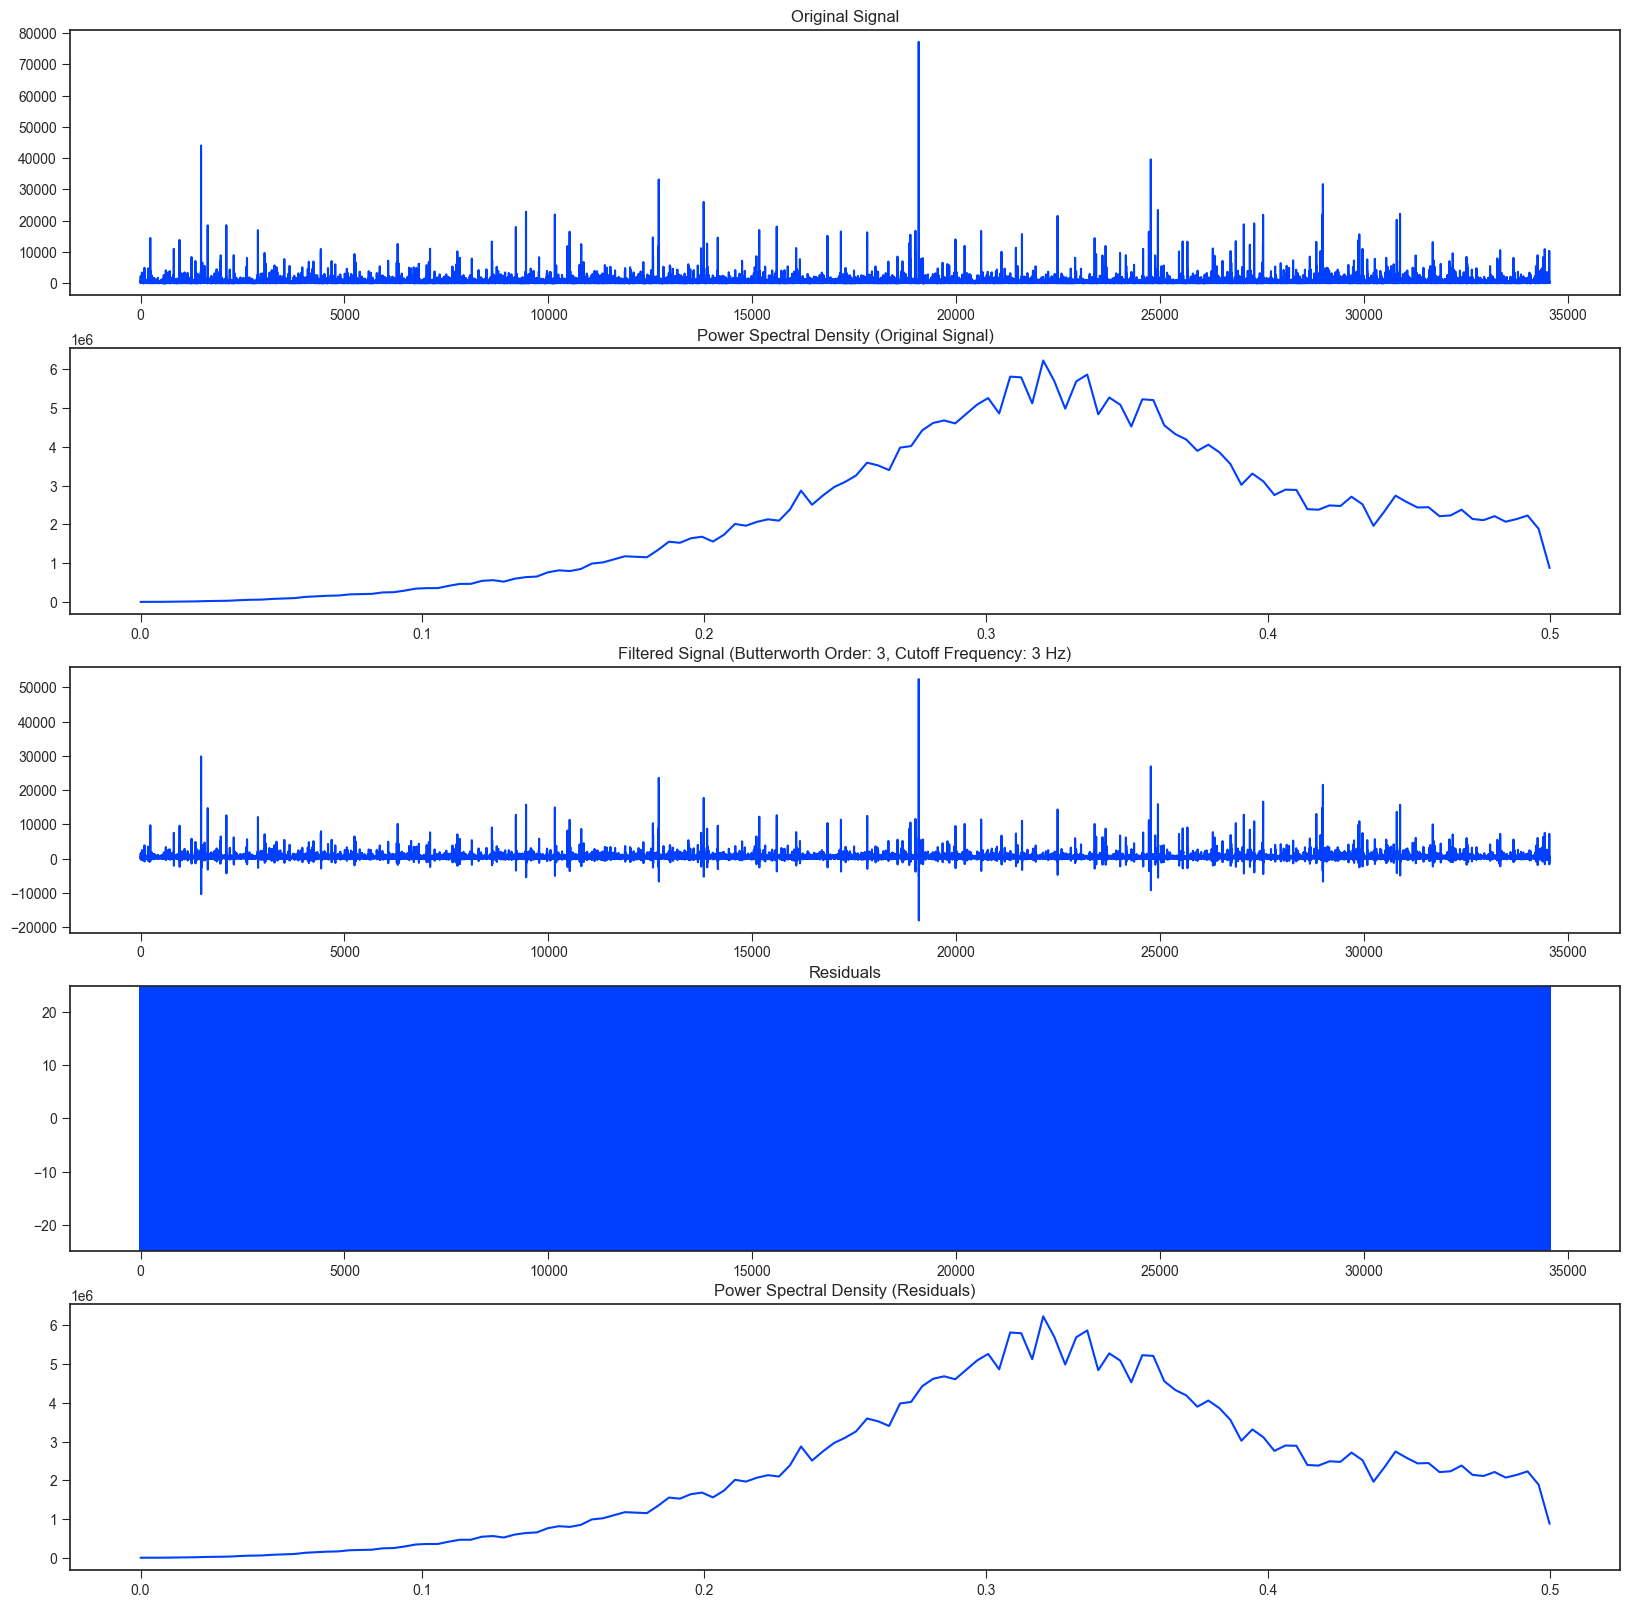

In [108]:
# Butterworth Filter in Low Pass

t = np.arange(0, data1.shape[0])
sig = data1.Revenue.values
RMSE = 10000000000
fss=0
order=0

for i in np.arange(3,20):
    for j in np.arange(i,30):
        sos = signal.butter(i, 1, 'lowpass', fs=j, output='sos')
        filtered = signal.sosfilt(sos, sig)
        freqs, psd = signal.welch(sig)
        freqs, psd = signal.welch(sig-filtered)
        MSE=100000000000000000000
        MSE = np.square(sig-filtered).mean() 
        if(RMSE > math.sqrt(MSE)):
            RMSE = math.sqrt(MSE)
            order = i
            fss = j
            fig = plt.figure(figsize=(20, 20))
            ax1 = plt.subplot(511)
            plt.plot(t, sig)
            plt.title('Original Signal')
            ax2 = plt.subplot(512)
            plt.plot(freqs, psd)
            plt.title('Power Spectral Density (Original Signal)')
            ax3 = plt.subplot(513)
            plt.plot(t, filtered)
            plt.title('Filtered Signal (Butterworth Order: {}, Cutoff Frequency: {} Hz)'.format(order, fss))
            ax4 = plt.subplot(514)
            plt.plot(t,sig-filtered)
            plt.ylim(-25,25)
            plt.title('Residuals')
            ax5 = plt.subplot(515)
            plt.plot(freqs, psd)
            plt.title('Power Spectral Density (Residuals)')
            plt.show()

# Testing Models

### ARIMA

In [226]:
from statsmodels.tsa.arima.model import ARIMA

data1 = sheets_combined.groupby(['InvoiceYear', 'InvoiceMonth'])['Revenue'].sum().reset_index()
# data1 = sheets_combined.groupby(['InvoiceDate'])['Revenue'].sum().reset_index()

In [227]:
# # get top 5 countries based on their revenue
# top_5_countries = sheets_combined.groupby(['Country'])['Revenue'].sum().reset_index().head()['Country']
# # print(top_5_countries)

# # filter the data with top_5_countries only
# data1 = sheets_combined[sheets_combined['Country'].isin(top_5_countries)]
# data1 = data1.groupby(['InvoiceDate'])['Revenue'].sum().reset_index()
# data1.shape

In [228]:
# defining the model using revenue column
model = ARIMA(data1['Revenue'], order=(1,1,1))
model_fit = model.fit()

# check summary of the model
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                   25
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -330.212
Date:                Wed, 21 Feb 2024   AIC                            666.424
Time:                        18:14:28   BIC                            669.958
Sample:                             0   HQIC                           667.361
                                 - 25                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4933      0.662      0.746      0.456      -0.803       1.790
ma.L1         -0.9133      0.407     -2.241      0.025      -1.712      -0.115
sigma2      6.261e+10   8.69e-12   7.21e+21      0.000    6.26e+10    6.26e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 9.91
Prob(Q):                              0.89   Prob(JB):                         0.01
Heteroskedasticity (H):               8.14   Skew:                            -1.22
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.97e+38. Standard errors may be unstable.
"""

<Axes: >

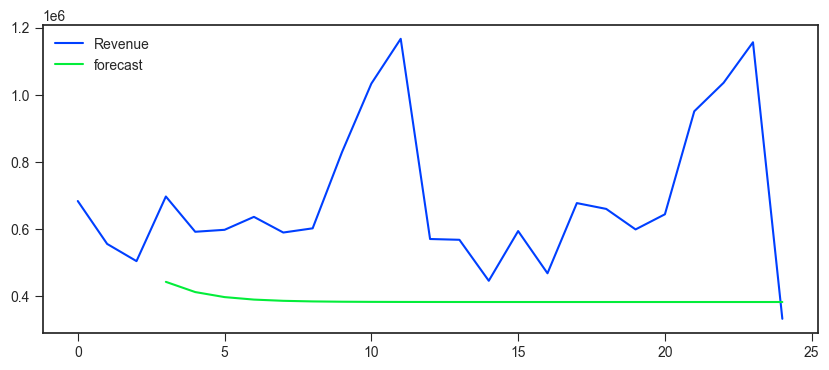

In [229]:
# testing the model
data1['forecast'] = model_fit.predict(start=3, end=25, dynamic=True)
# data1['forecast'] = model_fit.predict(start=30, end=290, dynamic=True)
data1[['Revenue','forecast']].plot(figsize=(10,4))

Here we can easily see the results we have got by the model is very unsatisfactory. This is because we have fit the model with a non-stationary time series. Without the stationary data, the model is not going to perform well. 

We need to apply the model with the data after differencing the time series. Often with the data where the effect of seasonality is in excess, we use the rolling mean differencing.

In [230]:
# Appling the rolling mean differencing
rolling_mean = data1['Revenue'].rolling(window = 3).mean()
data1['rolling_mean_diff'] = rolling_mean - rolling_mean.shift()

# Fitting and training the model again
model = ARIMA(data1['rolling_mean_diff'].dropna(), order=(1,1,1))
model_fit = model.fit()

<Axes: >

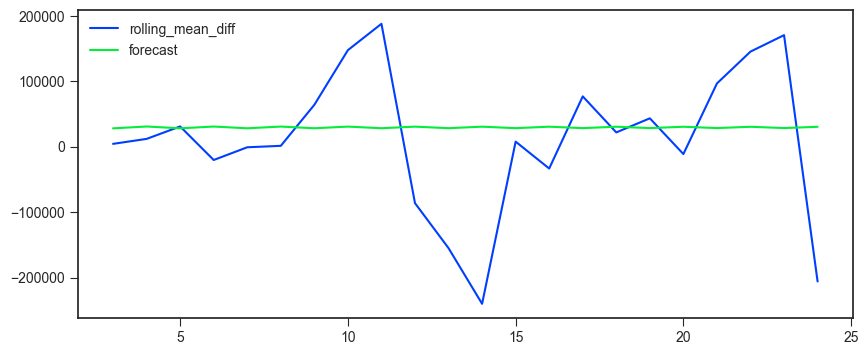

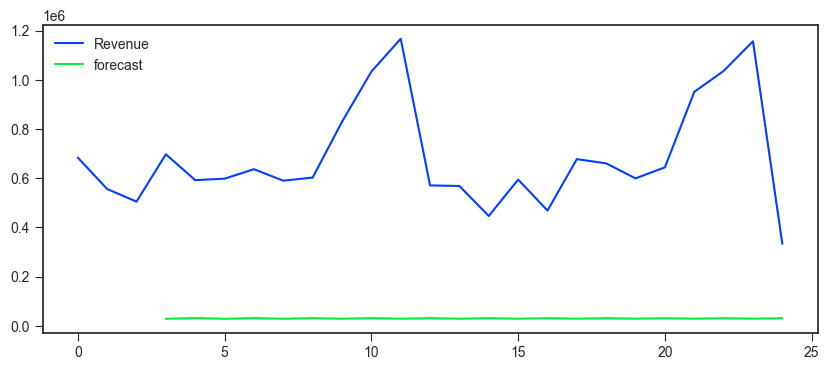

In [231]:
# testing the model again
data1['forecast'] = model_fit.predict(start=3, end=25, dynamic=True)
# data1['forecast'] = model_fit.predict(start=30, end=290, dynamic=True)

# plot
data1[['rolling_mean_diff','forecast']].plot(figsize=(10,4))
data1[['Revenue','forecast']].plot(figsize=(10,4))

Still not satisfactory.

### SARIMAX

In [232]:
import statsmodels.api as sm

In [233]:
# add invoice date
data1['InvoiceDate'] = pd.to_datetime(data1['InvoiceYear'].astype(str) + '-' + data1['InvoiceMonth'].astype(str) + '-01')

# Set 'Invoice Date' as index
data1.set_index('InvoiceDate', inplace=True)

# drop month and year
data1.drop(columns = ['InvoiceYear', 'InvoiceMonth'], inplace=True)

<Axes: xlabel='InvoiceDate'>

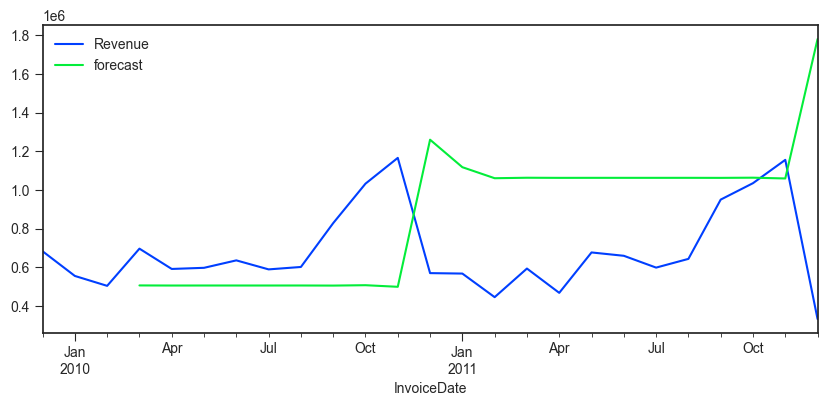

In [234]:
# fitting the model
model = sm.tsa.statespace.SARIMAX(data1['Revenue'], order=(1, 1, 1), seasonal_order=(1,1,1,12))
results = model.fit()

# predict and plot
data1['forecast'] = results.predict(start=3,end=25,dynamic=True)
data1[['Revenue','forecast']].plot(figsize=(10,4))

In [237]:
from pandas.tseries.offsets import DateOffset

# Making a NAN value future dataset
pred_date=[data1.index[-1]+ DateOffset(months=x)for x in range(0,25)]

# Giving similar names to columns
pred_date=pd.DataFrame(index=pred_date[1:],columns=data1.columns)
pred_date

,Revenue,forecast,rolling_mean_diff
2012-01-01,NaN,NaN,NaN
2012-02-01,NaN,NaN,NaN
2012-03-01,NaN,NaN,NaN
2012-04-01,NaN,NaN,NaN
2012-05-01,NaN,NaN,NaN
2012-06-01,NaN,NaN,NaN
2012-07-01,NaN,NaN,NaN
2012-08-01,NaN,NaN,NaN
2012-09-01,NaN,NaN,NaN
2012-10-01,NaN,NaN,NaN


To make forecasted values, we need to concate this blank data with our alcohol sales data.

<Axes: >

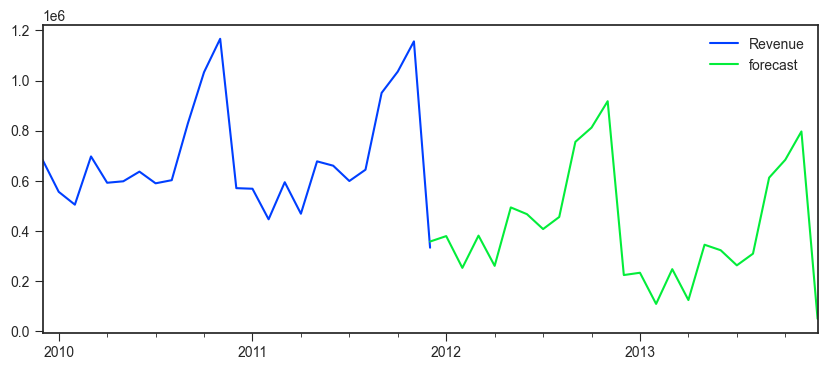

In [238]:
# concat
data2 = pd.concat([data1, pred_date])

# making the prediction on the future data using the SARIMAX model we have created before
data2['forecast'] = results.predict(start = 24, end = 50, dynamic= True)  
data2[['Revenue', 'forecast']].plot(figsize=(10,4))

somewhat satisfactory maybe??